<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Finance

---

## Utilizando Python para análises financeiras

Quando o plano é realizar análises tecnicas, extrair informações de portais de investimento, alimentar uma Inteligência Artificial para tomar decisões de compra e venda, o Python utilizado para área de finanças pode ser uma ferramenta que fará a diferença no mercado financeiro. 

Com Python é possível desenvolver diversas aplicações como: 

* Criar dashboards com diversos indicadores e cotações;
* Baixar demonstrações financeiras diretamente da CVM; 
* Realizar backtesting de maneira automatizada; 
* Enviar ordens de compra e venda via API de acordo com a estratégia configurada;
* Realizar análise de sentimento de notícias relacionadas à empresa;
* Criar coleções de NFT de maneiras automatizadas;
* Encontrar oportunidades de compra de NFT em marketplaces como OpenSea;
* Analisar várias criptomoedas simultaneamente; 
* Otimizar sua carteira de investimentos;
* Realizar Benchmarks com índices e fundos de investimento;



## Importar arquivos `csv` com as cotações do ativo

Para exemplificar como importar os dados com o Pandas, vamos utilizar os dados das ações ordinárias do Banco do Brasil (BBAS3) em formato `csv`.
Estes dados podem ser encontrados no site [Yahoo Finance](https://finance.yahoo.com/quote/BBAS3.SA/history?p=BBAS3.SA). 

Importar esse arquivo utilizando o Pandas pode ser tão simples quanto executar a função `pd.read_csv("local_do_arquivo.csv")`, informando o endereço que se encontra o `csv`, proveninente da máquina local ou mesmo diretamente da `url`. 
É possível fazer o download do arquivo diretamente do Terminal, criando diretórios e automatizando pipelines, contribuindo que o notebook seja replicado por mais pessoas. 


In [5]:
# baixar arquivo BBAS3.SA.csv
!wget https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/BBAS3.SA.csv

# ver o diretório
!ls -l

--2022-05-10 15:18:38--  https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/BBAS3.SA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17286 (17K) [text/plain]
Saving to: ‘BBAS3.SA.csv’

BBAS3.SA.csv        100%[===================>]  16.88K  --.-KB/s    in 0.001s  

2022-05-10 15:18:38 (28.3 MB/s) - ‘BBAS3.SA.csv’ saved [17286/17286]

total 24
-rw-r--r-- 1 root root 17286 May 10 15:18 BBAS3.SA.csv
drwxr-xr-x 1 root root  4096 May  3 13:42 sample_data


In [6]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# criando dataframe
df = pd.read_csv("BBAS3.SA.csv")

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,45.939960,46.576397,45.154615,45.838097,44.684901,1.405295e+07
std,7.644318,7.475109,7.858680,7.704523,7.210382,8.021174e+06
min,24.200001,25.000000,21.910000,22.129999,22.129999,5.092200e+06
25%,45.425002,46.145001,44.774999,45.415001,44.072172,8.997050e+06
50%,48.139999,48.779999,47.560001,47.990002,46.766251,1.198600e+07
75%,50.535000,51.125000,49.785000,50.460001,49.133178,1.587985e+07
max,55.599998,55.700001,54.820000,55.180000,53.052986,7.397800e+07


In [13]:
df['Volume'].std()

8021174.313261291

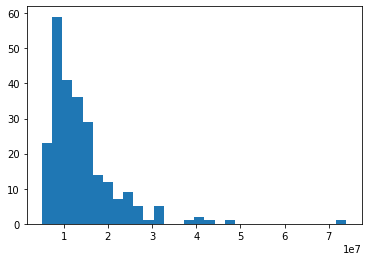

In [15]:
plt.hist(df['Volume'], bins=30);

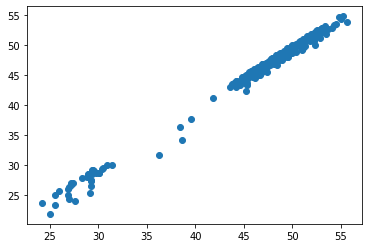

In [18]:
plt.scatter(df['Open'], df['Low'])

## Bibliotecas para Análise Financeira

Com todas as diversas bibliotecas que encontramos em Python para análise de mercado, infelizmente o Brasil não oferece um suporte tão grande quanto os Estados unidos, seja pela maturidade do mercado ou pelo volume negociado. 

### Utilizando Yahoo Finance para conseguir dados de cotação - `yfinance`

Apenas com o símbolo do ativo, através da `yfinance` é possível conseguir os preços de abertura, fechamento, volume, fechamento ajustado, máxima e mínima. 

Esta biblioteca não vem instalada por padrão no Google Colab, portanto é preciso instalar atráves do comando `!pip install yfinance -q`. 


In [54]:
# ao instalar yfinance o colab exigiu a atualização do pacote folium
!pip install folium -q

In [23]:
# instalando biblioteca yfinance
!pip install yfinance -q  

In [24]:
# importando biblioteca
import yfinance as yf

In [26]:
# declarando BBAS3.SA
bbas3 = yf.Ticker('BBAS3.SA')

In [27]:
# pegando dados historicos do mercado
hist = bbas3.history(period='max')

In [28]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.224946,1.248278,1.195781,1.195781,514800.0,0.0,0.0
2000-01-04,1.195781,1.198697,1.138908,1.138908,314100.0,0.0,0.0
2000-01-05,1.137450,1.152033,1.096618,1.150575,478800.0,0.0,0.0
2000-01-06,1.150574,1.166615,1.137450,1.166615,205200.0,0.0,0.0
2000-01-07,1.166615,1.166615,1.140366,1.140366,394200.0,0.0,0.0


In [29]:
# mostrando dividendos, splits
bbas3.actions

,Dividends,Stock Splits
Date,,
2007-06-04,0.000000,3.0
2009-06-23,0.180221,0.0
2009-08-14,0.190873,0.0
2009-09-22,0.185397,0.0
2009-11-13,0.122897,0.0
...,...,...
2021-09-14,0.184739,0.0
2021-11-23,0.393703,0.0
2021-12-14,0.174991,0.0


In [32]:
# conferindo informações da ação
bbas3.info 

{'52WeekChange': 0.11096561,
 'SandP52WeekChange': -0.038741827,
 'address1': 'Banco do Brasil Building',
 'address2': 'Quadra 5, Lote B Sector of Municipalities Norte Federal District',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 33.43,
 'askSize': 0,
 'averageDailyVolume10Day': 12564520,
 'averageVolume': 14653125,
 'averageVolume10days': 12564520,
 'beta': 0.779849,
 'beta3Year': None,
 'bid': 33.45,
 'bidSize': 0,
 'bookValue': 49.763,
 'category': None,
 'circulatingSupply': None,
 'city': 'Brasília',
 'companyOfficers': [],
 'country': 'Brazil',
 'currency': 'BRL',
 'currentPrice': 33.4,
 'currentRatio': None,
 'dateShortInterest': None,
 'dayHigh': 34.26,
 'dayLow': 33.31,
 'debtToEquity': None,
 'dividendRate': 1.6,
 'dividendYield': 0.0473,
 'earningsGrowth': 0.731,
 'earningsQuarterlyGrowth': 0.673,
 'ebitda': None,
 'ebitdaMargins': 0,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': 12.281,
 'enterpriseValue': 90915903

In [38]:
# conferindo dados financeiros
bbas3.financials

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,25757215000.0,12821042000.0,13783434000.0,19025243000.0
Minority Interest,2862168000.0,2403457000.0,1903656000.0,2510915000.0
Net Income,19710402000.0,12697385000.0,18162067000.0,12862026000.0
Selling General Administrative,35629827000.0,34047198000.0,34847301000.0,33261795000.0
Gross Profit,73278684000.0,57746081000.0,61011653000.0,59618435000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,29755578000.0,13805379000.0,17036523000.0,20312182000.0
Other Operating Expenses,7893279000.0,9893504000.0,9127829000.0,6044458000.0


In [39]:
# conferindo dados financerios por quadrimestres 
bbas3.quarterly_financials

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,7406253000.0,6760047000.0,6852585000.0,4738330000.0
Minority Interest,2862168000.0,2957922000.0,2564049000.0,2738063000.0
Net Income,5351963000.0,4608838000.0,5523694000.0,4225907000.0
Selling General Administrative,9197307000.0,8493555000.0,8698104000.0,9240861000.0
Gross Profit,18207474000.0,17857959000.0,19300757000.0,17912494000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,7745684000.0,7670088000.0,10560142000.0,3779664000.0
Other Operating Expenses,1264483000.0,1694316000.0,42511000.0,4891969000.0


In [41]:
# conferindo os maiores holders das ações, assim como a quantidade de cada um deles
bbas3.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,iShares MSCI Brazil ETF,14448019,2022-02-27,0.0050,508714748
1,Lazard Emerging Markets Equity Portfolio,12808226,2021-12-30,0.0045,369517320
2,Vanguard International Stock Index-Emerging Ma...,12116306,2022-01-30,0.0042,395718553
3,Vanguard International Stock Index-Total Intl ...,11184398,2022-01-30,0.0039,365282438
4,iShares Core MSCI Emerging Markets ETF,7003555,2022-02-27,0.0024,246595171
5,Vanguard International Value Fund,5775000,2022-01-30,0.0020,188611500
6,Delaware Ivy Emerging Markets Equity Fund,5128700,2021-12-30,0.0018,147962995
7,iShares ESG Aware MSCI EM ETF,4425322,2022-02-27,0.0015,155815587
8,Schwab Strategic Tr-Schwab Fundamental Emg Mkt...,4257244,2022-02-27,0.0015,149897561
9,PIMCO Equity Series-PIMCO RAE Emerging Markets Fd,4062900,2021-12-30,0.0014,117214665


In [44]:
# conferindo o balanço por ano
bbas3.balance_sheet

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,7.031258e+09,6.220666e+09,5.920549e+09,5.782032e+09
Total Liab,1.787676e+12,1.598701e+12,1.372530e+12,1.314649e+12
Total Stockholder Equity,1.419950e+11,1.245677e+11,1.066612e+11,9.974197e+10
Minority Interest,2.862168e+09,2.403457e+09,1.903656e+09,2.510915e+09
Other Current Liab,6.841630e+10,5.659272e+10,5.015906e+10,9.600237e+10
Total Assets,1.932533e+12,1.725672e+12,1.481095e+12,1.416901e+12
Common Stock,9.000002e+10,9.000002e+10,6.700000e+10,6.700000e+10
Other Current Assets,1.574565e+11,1.369531e+11,1.372411e+11,6.577648e+10
Retained Earnings,5.118029e+10,3.919847e+10,5.381466e+10,4.261258e+10
Other Liab,1.316896e+11,1.305880e+11,1.129271e+11,2.403604e+10


In [43]:
# conferindo o balanço por quadrimestre
bbas3.quarterly_balance_sheet

,2021-12-31,2021-09-30,2021-06-30,2021-03-31
Intangible Assets,7.031258e+09,5.044801e+09,4.764924e+09,4.977800e+09
Total Liab,1.787676e+12,1.827895e+12,1.714147e+12,1.691008e+12
Total Stockholder Equity,1.419950e+11,1.445540e+11,1.432430e+11,1.354572e+11
Minority Interest,2.862168e+09,2.957922e+09,2.564049e+09,2.738063e+09
Other Current Liab,6.841630e+10,6.582082e+10,5.988977e+10,5.718975e+10
Total Assets,1.932533e+12,1.975407e+12,1.859955e+12,1.829204e+12
Common Stock,9.000002e+10,9.000002e+10,9.000002e+10,9.000002e+10
Other Current Assets,1.574565e+11,1.547226e+11,1.500463e+11,1.438797e+11
Retained Earnings,5.118029e+10,4.873072e+10,4.581490e+10,4.178280e+10
Other Liab,1.316896e+11,1.432052e+11,1.323728e+11,1.319297e+11


In [45]:
# conferindo o fluxo de caixa anual
bbas3.cashflow

#bbas3.quarterly_cashflow

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Investments,-5.049078e+10,-9.416455e+10,-2.728768e+10,-1.153321e+10
Change To Liabilities,0.000000e+00,0.000000e+00,0.000000e+00,2.662160e+08
Total Cashflows From Investing Activities,-5.327815e+10,-9.564641e+10,-3.013845e+10,-1.059416e+10
Net Borrowings,-1.665358e+10,-1.278763e+10,-7.284291e+09,-3.097480e+09
Total Cash From Financing Activities,4.744407e+10,1.011075e+11,1.918133e+10,2.679381e+10
Change To Operating Activities,-1.612013e+11,4.105831e+10,-4.258229e+09,-4.313130e+10
Net Income,1.971040e+10,1.269738e+10,1.816207e+10,1.286203e+10
Change In Cash,-1.216948e+11,1.042535e+11,1.160057e+10,1.315150e+10
Effect Of Exchange Rate,1.553477e+09,1.032067e+10,-1.587850e+08,2.522422e+09
Total Cash From Operating Activities,-1.174142e+11,8.847173e+10,2.271647e+10,-5.570568e+09


In [47]:
# conferindo os rendimentos da empresa
bbas3.earnings

,Revenue,Earnings
Year,,
2018,60334372000,12862026000
2019,61745862000,18162067000
2020,58483157000,12697385000
2021,74031801000,19710402000


In [48]:
# conferindo as relações da empresa
bbas3.sustainability

,Value
2022-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.21
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [50]:
# recomendações de especialistas
bbas3.recommendations

In [51]:
# conferindo o calendario 
bbas3.calendar

,Value
Earnings Date,2022-05-11 19:00:00
Earnings Average,1.91
Earnings Low,1.81
Earnings High,2.04
Revenue Average,24553400000
Revenue Low,23088300000
Revenue High,25676900000


In [52]:
# conferindo as ultimas notícias
bbas3.news

[{'link': 'https://finance.yahoo.com/news/jars-ceramics-presents-dashi-collection-174600014.html',
  'providerPublishTime': 1652204760,
  'publisher': 'GlobeNewswire',
  'title': 'Jars Ceramics Presents the Dashi Collection',
  'type': 'STORY',
  'uuid': '23bdcf5d-f186-377c-b829-8e75a5f71abf'},
 {'link': 'https://finance.yahoo.com/news/sentinelone-rapid-growth-cybersecurity-174539495.html',
  'providerPublishTime': 1652204739,
  'publisher': 'GuruFocus.com',
  'title': 'SentinelOne: Rapid Growth in Cybersecurity',
  'type': 'STORY',
  'uuid': '32e60016-7d23-3c68-b5a9-3664d7c24251'},
 {'link': 'https://finance.yahoo.com/news/inventhelp-inventor-develops-innovative-stroller-174500764.html',
  'providerPublishTime': 1652204700,
  'publisher': 'PR Newswire',
  'title': 'InventHelp Inventor Develops Innovative Stroller for Babies (NAM-146)',
  'type': 'STORY',
  'uuid': '0d5946d2-11a0-3a2a-bebe-1aa89c7a9061'},
 {'link': 'https://finance.yahoo.com/news/global-mobile-phone-accessories-market-

Para utilizar o recurso do cache, ou seja, armazenar chamadas à API de sessões anteriores, ou mesmo customizar o cabeçalho `User-agent`, utilize o código abaixo (descrito na documentação da biblioteca)


In [55]:
!pip install requests_cache -q
import requests_cache

session = requests_cache.CachedSession('yfinance.cache')
session.headers['User-agent'] = 'my-program/1.0'
ticker = yf.Ticker('bbas3.sa itub4.sa', session=session)

ticker.actions

- BBAS3.SA ITUB4.SA: No data found, symbol may be delisted


[]

Para inicializar vários ativos instanciados em classes `Ticker`, informe os símbolos das ações da seguinte maneira.

In [58]:
# retorna uma tupla com objetos Ticker
tickers = yf.Tickers('bbas3.sa itub3.sa petr4.sa')
tickers

yfinance.Tickers object <BBAS3.SA,ITUB3.SA,PETR4.SA>

In [59]:
# para acessar os ativos de forma individual
tickers.tickers['BBAS3.SA'].info

{'52WeekChange': 0.11096561,
 'SandP52WeekChange': -0.038741827,
 'address1': 'Banco do Brasil Building',
 'address2': 'Quadra 5, Lote B Sector of Municipalities Norte Federal District',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 33.55,
 'askSize': 0,
 'averageDailyVolume10Day': 12564520,
 'averageVolume': 14653125,
 'averageVolume10days': 12564520,
 'beta': 0.779849,
 'beta3Year': None,
 'bid': 33.55,
 'bidSize': 0,
 'bookValue': 49.763,
 'category': None,
 'circulatingSupply': None,
 'city': 'Brasília',
 'companyOfficers': [],
 'country': 'Brazil',
 'currency': 'BRL',
 'currentPrice': 33.56,
 'currentRatio': None,
 'dateShortInterest': None,
 'dayHigh': 34.26,
 'dayLow': 33.31,
 'debtToEquity': None,
 'dividendRate': 1.6,
 'dividendYield': 0.0473,
 'earningsGrowth': 0.731,
 'earningsQuarterlyGrowth': 0.673,
 'ebitda': None,
 'ebitdaMargins': 0,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': 12.281,
 'enterpriseValue': 9091590

In [60]:
tickers.tickers['ITUB3.SA'].history(period='1mo')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-11,22.759978,22.959801,22.720012,22.749987,682600,0.00000,0
2022-04-12,22.959801,22.999767,22.370319,22.370319,630300,0.00000,0
2022-04-13,22.570144,22.769969,22.290390,22.420277,546200,0.00000,0
2022-04-14,22.500206,22.630091,22.310372,22.580135,448700,0.00000,0
2022-04-18,22.440258,22.759978,22.440258,22.650074,610900,0.00000,0
2022-04-19,22.650073,22.730002,22.130529,22.360327,537800,0.00000,0
2022-04-20,22.330355,22.560152,22.170496,22.380310,824800,0.00000,0
2022-04-22,22.240433,22.240433,21.800820,21.950687,406300,0.00000,0
2022-04-25,21.900733,22.150513,21.541048,22.020628,1215100,0.00000,0


In [62]:
tickers.tickers['PETR4.SA'].actions

,Dividends,Stock Splits
Date,,
2005-04-01,0.133288,0.0
2005-07-01,0.250663,0.0
2005-09-01,0.000000,4.0
2006-01-02,0.259000,0.0
2006-04-04,0.132700,0.0
2006-11-01,0.500750,0.0
2007-01-02,0.225000,0.0
2007-04-03,0.175000,0.0
2007-08-20,0.251700,0.0


In [63]:
tickers.symbols

['BBAS3.SA', 'ITUB3.SA', 'PETR4.SA']

## Biblioteca para Análise Quantitativa

Conheça agora as principais bibliotecas para análise de ativos, e que serão utilizadas para construção de dashboards interativos.

### Portfolio Analytics for Quants (QuantStats)
Essa é uma biblioteca para proceder com análises quantitativas, trazendo profundidade nas análises e métricas de risco.

Esta biblioteca é composta de 3 módulos principais:

1.   `quantstats.stats` - calcula várias métricas de performance como Índice Sharpe, WinRate, Volatilidade, entre outras.
2.   `quantstats.plots` - para visualizar performance, drawdowns, rolling statistics, monthly returns, entre outros.
3.   `quantstats.reports` - para gerar relatórios de métricas, assim como gerar planilhas que podem ser salvas em um arquivo HTML.

Também será necessária a instalação desta biblioteca.




In [64]:
# instalando bilbioteca quantstats
!pip install quantstats -q

     |████████████████████████████████| 41 kB 208 kB/s 


In [65]:
# importar a biblioteca quantstats
import quantstats as qs

In [66]:
# extender funcionalidades para o pandas
qs.extend_pandas()

In [67]:
# baixar dados do ativo ITUB3
itub3 = qs.utils.download_returns('ITUB3.SA')

In [68]:
# mostrar o índice de sharpe
qs.stats.sharpe(itub3)

0.5421512181116288

In [70]:
# índice sharpe através do pandas
itub3.sharpe()

0.5421512181116288

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


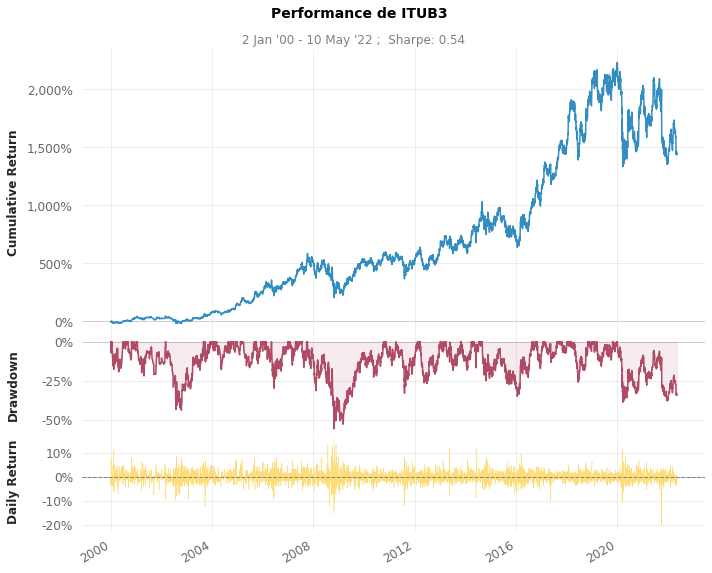

In [71]:
# visualizando a performance de uma ação
qs.plots.snapshot(itub3, title='Performance de ITUB3')

Uma das principais funcionalidades da biblioteca `quantstats` é a sua capacidade de gerar relatórios com apenas uma linha de código.
Dentro da ferramenta você irá encontrar 7 tipos possíveis de relatórios:

1.   `qs.reports.metrics(mode='basic', ...)`
2.   `qs.reports.metrics(mode='full', ...)`
3.   `qs.reports.plots(mode='basic', ...)`
4.   `qs.reports.plots(mode='full', ...)`
5.   `qs.reports.basic(...)`
6.   `qs.reports.full(...)`
7.   `qs.reports.html(...)`

Um parâmetro importante que pode ser passado, é o símbolo do ativo para servir de benchamark. 



[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-01-03  2000-01-03
End Period                 2022-05-10  2022-05-10
Risk-Free Rate             0.0%        0.0%
Time in Market             81.0%       99.0%

Cumulative Return          1,439.88%   510.96%
CAGR﹪                     13.0%       8.43%

Sharpe                     0.54        0.43
Prob. Sharpe Ratio         99.47%      97.89%
Smart Sharpe               0.52        0.41
Sortino                    0.79        0.61
Smart Sortino              0.77        0.59
Sortino/√2                 0.56        0.43
Smart Sortino/√2           0.54        0.42
Omega                      1.11        1.11

Max Drawdown               -55.43%     -59.96%
Longest DD Days            1099        3400
Volatility (ann.)          32.22%      28.11%
R^2                        0.33        0.33
Information Ratio          0.01        0.01
Calmar         

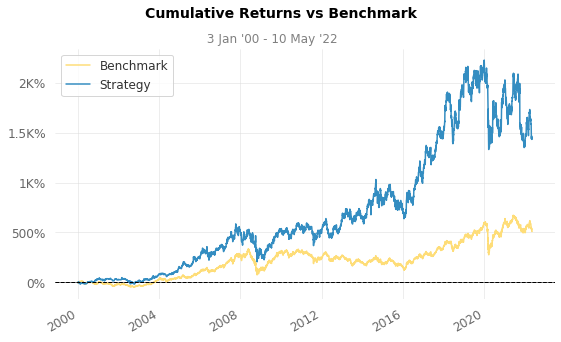

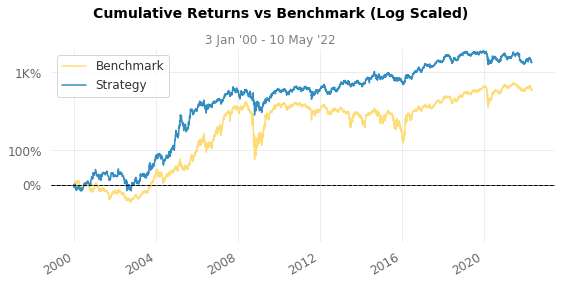

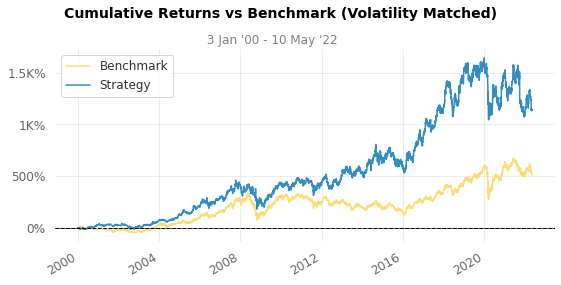

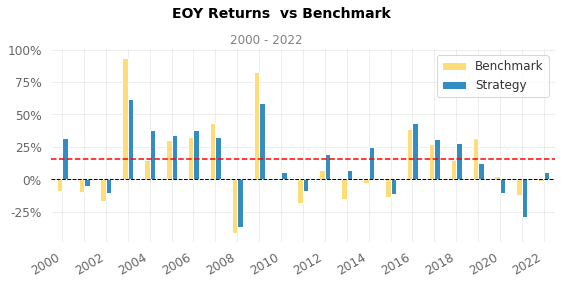

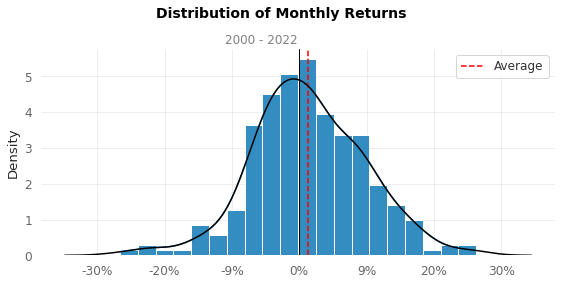

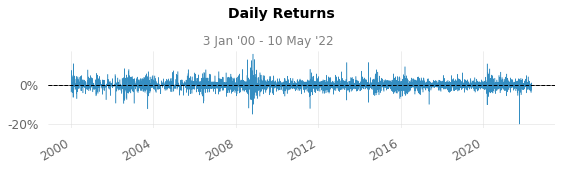

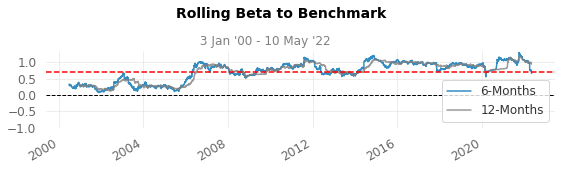

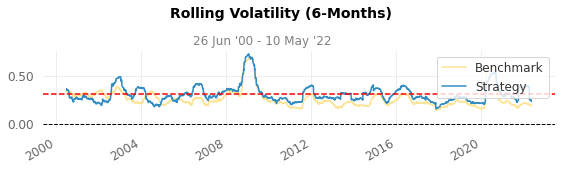

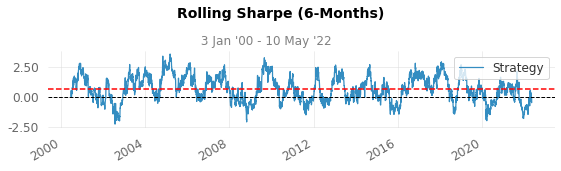

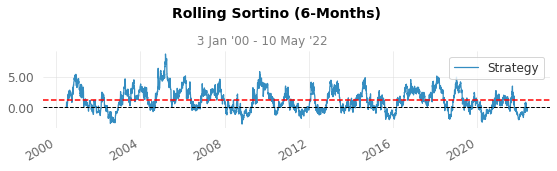

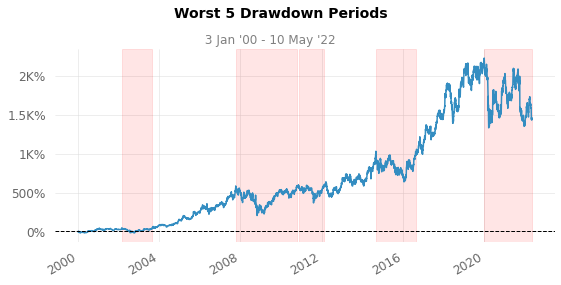

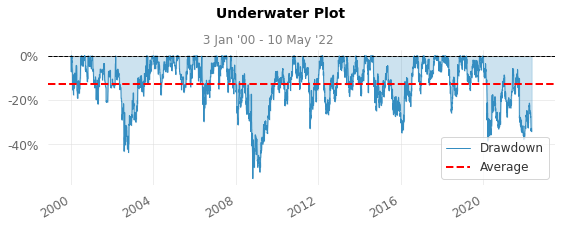

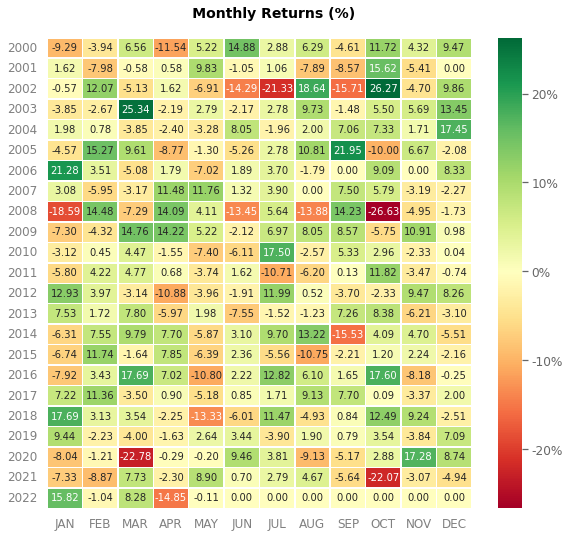

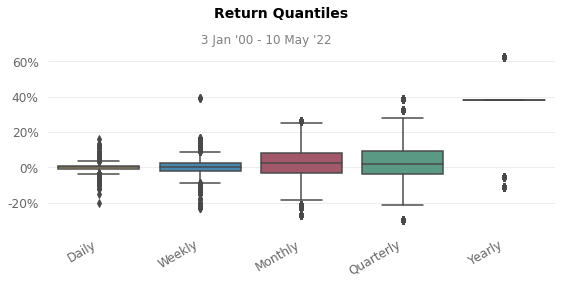

In [77]:
# Exemplo de um relátorio completo
qs.reports.full(itub3, benchmark="^BVSP")

- ˆBVSP: No data found, symbol may be delisted


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.7/dist-packages/quantstats/stats.py:877: RuntimeWarning: invalid value encountered in double_scalars
  beta = matrix[0, 1] / matrix[1, 1]
/usr/local/lib/python3.7/dist-packages/quantstats/stats.py:877: RuntimeWarning: invalid value encountered in double_scalars
  beta = matrix[0, 1] / matrix[1, 1]


ValueError: ignored

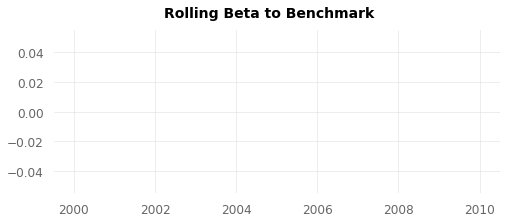

In [80]:
# gerar relatório em um arquivo html
qs.reports.html(itub3, benchmark='ˆBVSP', output='relatorio.html')

In [88]:
# gerando itens do relatório individualmente
itub3.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2000,-0.092858,-0.039369,0.065574,-0.115385,0.052174,0.148761,0.028776,0.062938,-0.046053,0.117242,4.320953e-02,9.467422e-02,0.331214
2001,0.016216,-0.079787,-0.005781,0.005814,0.098265,-0.010526,0.010638,-0.078947,-0.085714,0.156249,-5.405363e-02,4.440892e-16,-0.025605
2002,-0.005714,0.120690,-0.051282,0.016216,-0.069149,-0.142857,-0.213333,0.186441,-0.157143,0.262712,-4.697951e-02,9.859113e-02,-0.038937
2003,-0.038461,-0.026667,0.253425,-0.021858,0.027932,-0.021738,0.027777,0.097298,-0.014778,0.055000,5.687281e-02,1.345277e-01,0.542524
2004,0.019764,0.007752,-0.038462,-0.024000,-0.032787,0.080509,-0.019608,0.020001,0.070587,0.073261,1.706386e-02,1.744975e-01,0.354678
2005,-0.045715,0.152695,0.096104,-0.087678,-0.012987,-0.052631,0.027777,0.108109,0.219511,-0.100000,6.666641e-02,-2.083301e-02,0.331517
2006,0.212766,0.035088,-0.050847,0.017857,-0.070176,0.018869,0.037037,-0.017857,0.000000,0.090909,2.220446e-16,8.333354e-02,0.388014
2007,0.030769,-0.059533,-0.031746,0.114755,0.117647,0.013158,0.038961,0.000000,0.075000,0.057907,-3.190355e-02,-2.272756e-02,0.330485
2008,-0.185933,0.144774,-0.072907,0.140948,0.041120,-0.134487,0.056418,-0.138795,0.142317,-0.266280,-4.950066e-02,-1.727812e-02,-0.304304
2009,-0.072992,-0.043207,0.147642,0.142234,0.052160,-0.021201,0.069677,0.080535,0.085722,-0.057545,1.090508e-01,9.763260e-03,0.515162


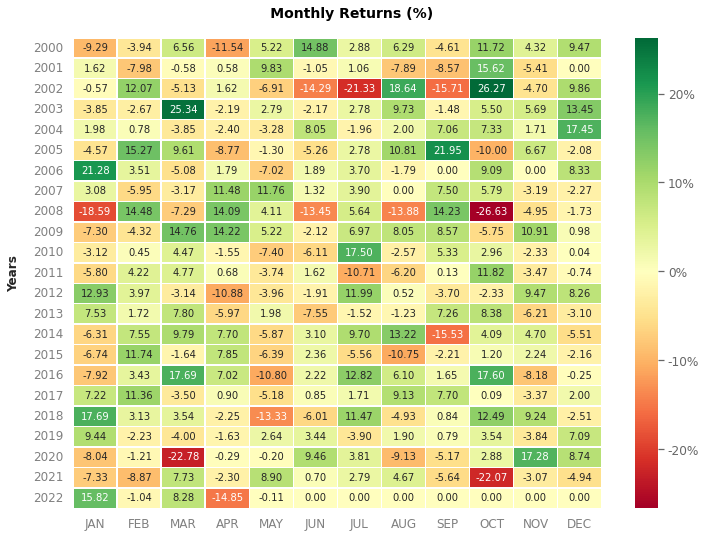

In [89]:
# gerando mapa de calor para retorno mensal
itub3.plot_monthly_heatmap()

In [94]:
itub3.volatility()

0.322167284327055

In [95]:
# listar todas as features disponíveis
dir(qs.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 '_ceil',
 '_linregress',
 '_norm',
 '_np',
 '_pd',
 '_sqrt',
 '_utils',
 'adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_r

## Technical Analysis Library (TA)

`ta` é uma biblioteca voltada para análise de séries temporais financeiras (abertura, fechamento, máxima, mínima e volume). 
Pensada para servir como apoio as técnicas de *feature engineering* no contexto do Python, a mesma é a construída em cima da conhecida biblioteca Pandas.

Assim como as anteriores, faz-se necessária sua instalação dentro do ambiente Google Colab.


In [105]:
# instalando ta
!pip install ta -q

In [113]:
# importando ta
import ta

from ta.volatility import BollingerBands

In [107]:
# baixando dados da PETR4 para exemplificação 
df = yf.download('petr4.sa')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,2.930677,35389440000
2000-01-04,5.550,5.550,5.550,5.550,2.768553,28861440000
2000-01-05,5.494,5.494,5.494,5.494,2.740619,43033600000
2000-01-06,5.475,5.475,5.475,5.475,2.731141,34055680000
2000-01-07,5.500,5.500,5.500,5.500,2.743612,20912640000


Veja um exemplo onde facilmente conseguimos calcular as bandas superior e inferior de Bollinger.

#### Bandas de Bollinger

Como exemplo de aplicação das Bandas de Bollinger, vamos relembrar que elas consistem em três partes: Banda do Meio, Banda Superior e Banda Inferior.

Muito utilizadas quando se busca um indicador de volatilidade de um determinado ativo, elas servem de insumos para o processo decisório de compra ou venda de um papel.



<center><img src="https://origin2.cdn.componentsource.com/sites/default/files/resources/dundas/538216/Documentation/images/BollingerBands.png" height="200px"></center>


Por padrão, é utilizado o valor de 20 períodos para seu cálculo. Mas claro que pode ser alterado de acordo com a análise desejada, sendo o período `n = 20` apenas uma recomendação do próprio Bollinger, criador do indicador.

Matematicamente, os cálculos das Bandas é definido da seguinte maneira, sendo $y$ o valor do Fechamento (`Close`) da cotação.

\begin{align*}
&\mathbf{MA} = \frac{\sum\limits_{i=1}^n y_i}{n}\\
&\mathbf{UpperBB} = MA + D \sqrt{\frac{\sum\limits_{i=1}^n (y_i - MA)^2}{n}}\\
&\mathbf{LowerBB} = MA + D \sqrt{\frac{\sum\limits_{i=1}^n (y_i - MA)^2}{n}}
\end{align*}

Um investidor poderia desejar calcular tais valores, mas observe como tudo se torna muito simples e direto com a biblioteca `ta`.

In [116]:
bb = BollingerBands(close=df['Close'], window=20, window_dev=2)

Agora basta extrair os cálculos desse indicador. No caso, vamos associar cada um deles a uma nova coluna dentro do mesmo dataframe.

In [117]:
# Bollinger median average
df['bb_bbm'] = bb.bollinger_mavg()
df['bb_bbh'] = bb.bollinger_hband()
df['bb_bbl'] = bb.bollinger_lband()

In [118]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,
2022-05-04,30.600000,32.169998,30.400000,32.070000,32.070000,109417000,31.722,34.892240,28.551760
2022-05-05,31.809999,32.500000,31.020000,32.009998,32.009998,99439900,31.703,34.861532,28.544468
2022-05-06,32.689999,33.119999,31.900000,33.060001,33.060001,129570200,31.738,34.940090,28.535909
2022-05-09,32.700001,33.040001,32.060001,32.160000,32.160000,92314500,31.644,34.676130,28.611869
2022-05-10,32.360001,32.849998,32.200001,32.430000,32.430000,47356600,31.555,34.377910,28.732090


De forma simples calculamos os valores das Bandas de Bollinger. Agora com as informações necessárias, vamos plotar as informações diretamente do DataFrame.

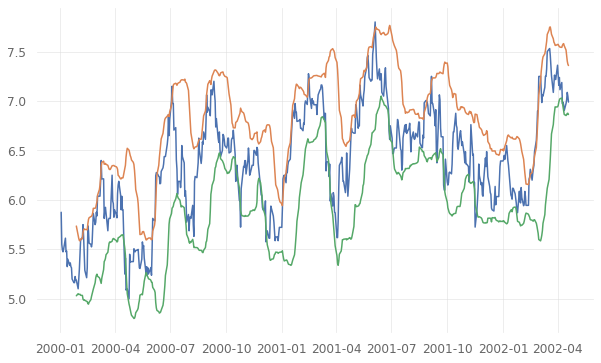

In [124]:
# importando matplotlib
import matplotlib.pyplot as plt

plt.plot(df["Close"][:600])
plt.plot(df['bb_bbh'][:600])
plt.plot(df['bb_bbl'][:600])


Existem diversas bibliotecas mais modernas e com mais interatividade, mais adequadas para o contexto dos indicadores técnicos. A proxima biblioteca a ser abordada é a `plotly`.

A biblioteca TA tem uma lista de diversos indicadores, para conhecê-los, basta acessar a documentação da biblioteca.

[Repositório e documentação da biblioteca TA](https://github.com/bukosabino/ta)